On this application we will use logical regression to make classification model to predict survival values. We'll use train.csv file to train our model and test.csv mopdel to test our preditcion model. At the end of this application we will calculate our error persentage.

To do this first we'll load the dataset and then we will handle with the missimng values. After that, we will try to understand dataset's structure and then we will analyze which features are best for our target.

Import necessary libraries


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading Dataset


In [5]:
train_df = pd.read_csv("train.csv")

Handle with missing values

In [6]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
train_df['Cabin'].fillna("Unknown", inplace=True)
train_df['Embarked'].fillna("Unknown", inplace=True)
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

As you can see there is no missing value anymore. However, we fill that values:

Age(177) with mean of age

Embarked(2) and cabin(687) with 'Unknown'

So especially cabin can not be a reliable feature for us. Additionally embarked can be and age can be but we need to anaklyze which one or ones is best for our purpose.

First and foremost we need to understand Dataset's structure

In [10]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


Analyzing

<Axes: title={'center': 'Sex - Survival Rate'}, xlabel='Sex', ylabel='Survival Rate'>

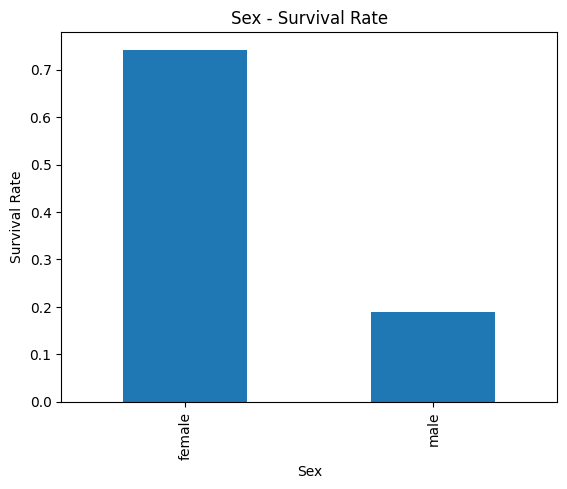

In [35]:
plt.title("Sex - Survival Rate")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
(train_df.groupby(['Sex']).sum()['Survived'] / train_df.groupby(['Sex']).count()['Survived']).plot.bar()

<Axes: title={'center': 'Embarked - Survival Rate'}, xlabel='Embarked', ylabel='Survival Rate'>

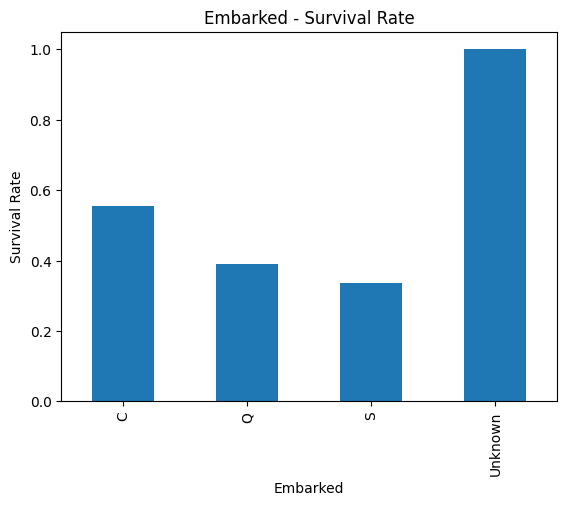

In [36]:
plt.title("Embarked - Survival Rate")
plt.xlabel("Embarked")
plt.ylabel("Survival Rate")
(train_df.groupby(['Embarked']).sum()['Survived'] / train_df.groupby(['Embarked']).count()['Survived']).plot.bar()

<Axes: title={'center': 'Pclass - Survival Rate'}, xlabel='Pclass', ylabel='Survival Rate'>

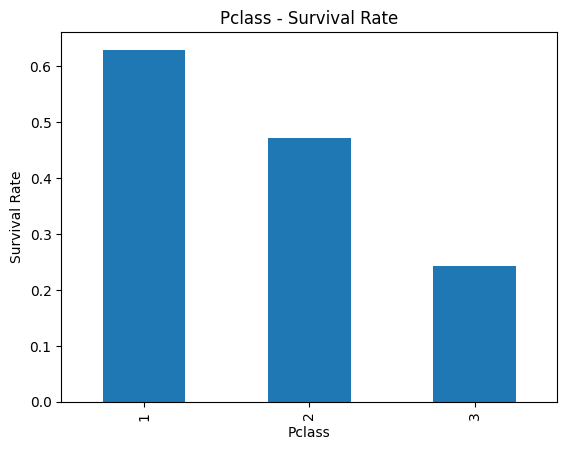

In [40]:
plt.title("Pclass - Survival Rate")
plt.xlabel("Pclass")
plt.ylabel("Survival Rate")
(train_df.groupby(['Pclass']).sum()['Survived'] / train_df.groupby(['Pclass']).count()['Survived']).plot.bar()

Text(0, 0.5, 'Survival Rate')

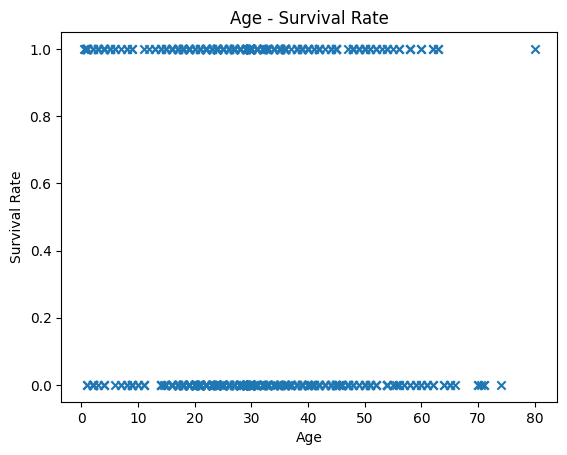

In [39]:
plt.scatter(train_df['Age'], train_df['Survived'], marker='x')
plt.title("Age - Survival Rate")
plt.xlabel("Age")
plt.ylabel("Survival Rate")

Accourding to analyses I will use Embarked, Age, Sex and Pclass.
(On next we will try to select most significant ones to avoid overfitting)

Defining Logical Regression Functions

In [42]:
def f_wb (x, w, b): # Gets 2 vectors(w and x) and a scaler(b)
    # returns a vector
    return 1/(1+ np.exp(-(w*x+b)))

In [43]:
def loss_function (x, y, w, b): # Gets 3 vectors(w, x and y) and a scaler(b)
    # returns a vector
    return (-y * np.log(f_wb(x,w,b)) - (1-y) * np.log(1 - f_wb(x,w,b)))

In [44]:
def cost_function (x, y, w, b): # Gets 3 vectors(w, x and y) and a scaler(b)
    # returns a scaler
    m = len(x)
    return np.sum(loss_function) / m 

In [45]:
def gradient_compute (x, y, w, b): # Gets 3 vectors(w, x and y) and a scaler(b)
    # returns two scalers
    m = len(x)
    dj_dw = np.sum((f_wb(x,w,b)-y) * x) / m
    dj_db = np.sum(f_wb(x,w,b)-y) / m
    return dj_dw, dj_db

In [47]:
def gradient_descent (x, y, w, b, alpha = 0.01, iterations = 10000): # Gets three vectors(w, x and y) and three scaler(b, alpha and iterations)
    # alpha represents, how far gradient goes for each step
    # iterations represents how many iterations will done
    # returns a vector(best w values) and a scaler(best b)
    for i in range(iterations):
        tmpw = w
        tmpb = b

        dj_dw, dj_db = gradient_compute(x, y, w, b)

        tmpw -= alpha * dj_dw
        tmpb -= alpha * dj_db
    
        w = tmpw
        b = tmpb

    return w, b

    # Note:  Also we can find the concavity automaticly, but I don't use this for now.

Time to find concavity by using cost function